# SF-DAT-21 | Unit Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in Unit Projects 1 and 2.

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
from sklearn import linear_model

%matplotlib inline

In [142]:
df_raw = pd.read_csv("../../dataset/admissions.csv")
df = df_raw.dropna()
print df.head()
df

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


## Part 1. Frequency Tables

#### Question 1. Let's create a frequency table of our variables.

In [143]:
# frequency table for prestige and whether or not someone was admitted
#a=pd.Series(df.admit,df.prestige)



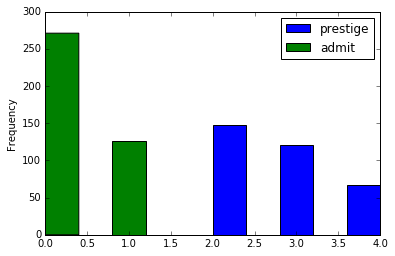

In [144]:
df[['prestige','admit']].plot(kind='Hist')

A histogram can be constructed for a frequency distribution. It reveals the following:
1)There are around 275 students who did not get admission
2)A total of 125 students were admitted
In terms of Prestige, we can infer the following:
1)Around 150 students who applied came from a Prestige 2 institute
2)~125 who applied were for a Prestige 3 institute
3)75 people came from prestige 4 institute

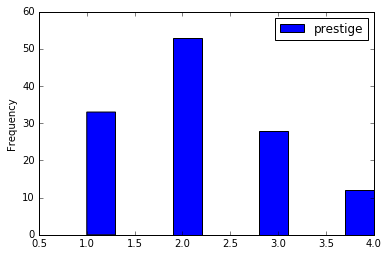

In [145]:
df[(df.admit==1)][['prestige']].plot(kind='Hist')

In [146]:
df[(df.admit==1)].count()

admit       126
gre         126
gpa         126
prestige    126
dtype: int64

The following can be inferred about the students who were admitted:
1)~35 students with prestige =1
2)~55 students with prestige =2
3)~25 students with prestige =3
4)~10 students with prestige =4

## Part 2. Return of dummy variables

#### Question 2.1. Create class or dummy variables for prestige.

In [147]:
dummy_ranks = pd.get_dummies(df.prestige,prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']




,prestige_1,prestige_2,prestige_3,prestige_4
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0


#### Question 2.2. When modeling our class variables, how many do we need?

Answer:If we are creating a Dummy varibale for a categorical variable that has n values , we would need a total of 'n' new featues variables 

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [148]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_1':])
print handCalc.head()
type(handCalc)

   admit    gre   gpa  prestige_1  prestige_2  prestige_3  prestige_4
0      0  380.0  3.61         0.0         0.0         1.0         0.0
1      1  660.0  3.67         0.0         0.0         1.0         0.0
2      1  800.0  4.00         1.0         0.0         0.0         0.0
3      1  640.0  3.19         0.0         0.0         0.0         1.0
4      0  520.0  2.93         0.0         0.0         0.0         1.0


pandas.core.frame.DataFrame

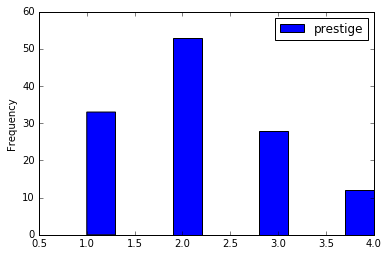

In [149]:
# crosstab prestige 1 admission
# frequency table cutting prestige and whether or not someone was admitted
df[(df.admit==1)][['prestige']].plot(kind='Hist')

#### Question 3.1. Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college.

In [150]:
#Assumption- Prestige 1 maps to rank1
df[(df.admit==0) & (df.prestige==1)].count()

admit       28
gre         28
gpa         28
prestige    28
dtype: int64

In [151]:
df[(df.admit==1) & (df.prestige==1)].count()

admit       33
gre         33
gpa         33
prestige    33
dtype: int64

Total student who were admitted with Rank#1= 33
Total student who were not admitted with Rank#1= 28
odds ratio= 1.17

#### Question 3.2. Now calculate the odds of admission if you did not attend a #1 ranked college.

In [152]:
df[(df.admit==1) & (df.prestige!=1)].count()

admit       93
gre         93
gpa         93
prestige    93
dtype: int64

In [153]:
df[(df.admit==1) & (df.prestige!=1)].count()

admit       93
gre         93
gpa         93
prestige    93
dtype: int64

Total student who were admitted and who did not attend a rank 1 college= 93
Total student who were not admitted and who did not attend a rank 1 college= 243




#### Question 3.3. Calculate the odds ratio.

odds ratio=(admitted with rank !=1)/(admitted with rank =1)
odds=243/93=2.61

#### Question 3.4. Write this finding in a sentenance:

Answer:Students who came from a a college with Rank!=1 have twice as much chance of getting admitted compared to those who apply from college with rank=1

#### Question 3.5. Print the cross tab for prestige_4.

In [154]:
df[(df.admit==1) & (df.prestige==4)].count()

admit       12
gre         12
gpa         12
prestige    12
dtype: int64

In [155]:
df[(df.admit==1) & (df.prestige!=4)].count()

admit       114
gre         114
gpa         114
prestige    114
dtype: int64

#### Question 3.6. Calculate the OR.

odds ratio= Students admitted with prestige 4/students who were admitted with Prestige!=4
odds ratio=12/114=.105

#### Question 3.7. Write this finding in a sentence.

Answer:students who apply from a prestige 4 college have only 1 in 105 chance in getting admission 

## Part 4. Analysis

In [156]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2  prestige_3  prestige_4
0      0  380.0  3.61         0.0         1.0         0.0
1      1  660.0  3.67         0.0         1.0         0.0
2      1  800.0  4.00         0.0         0.0         0.0
3      1  640.0  3.19         0.0         0.0         1.0
4      0  520.0  2.93         0.0         0.0         1.0


We're going to add a constant term for our Logistic Regression.  The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [157]:
# manually add the intercept
data['intercept'] = 1.0

#### Question 4.1. Set the covariates to a variable called train_cols.

In [158]:
data.head()
train_cols = data[['gre','gpa','prestige_2','prestige_3','prestige_4']]

#### Question 4.2. Fit the model.

In [159]:
model = linear_model.LogisticRegression()
model.fit(train_cols,data.admit)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [160]:
model.score(train_cols,data.admit)

0.70528967254408059

In [161]:
#model = sm.Logit(df.admit,train_cols).fit()

#### Question 4.3. Print the summary results.

In [162]:
model.intercept_

array([-1.81701706])

In [163]:
model.coef_

array([[ 0.00178497,  0.23229458, -0.60347467, -1.17214957, -1.37729795]])

#### Question 4.4. Calculate the odds ratios of the coeffincients and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params

        conf.columns = ['2.5%', '97.5%', 'OR']

In [164]:
odds_gre = np.exp(0.00178497)
print  "The odds for GRE %r--> " %odds_gre

odds_gpa = np.exp(0.23229458)
print "The odds for GPA %r-->" %odds_gpa

odds_pres_2 = np.exp(-0.60347467)
print "The odds for PRES2 %r--" %odds_pres_2

odds_pres_3 = np.exp(-1.17214957)
print "The odds for PRES3 %r--" %odds_pres_3

odds_pres_4 = np.exp(-1.37729795)
print "The odds for PRES4 %r--" %odds_pres_4



The odds for GRE 1.0017865640072277--> 
The odds for GPA 1.2614912842017518-->
The odds for PRES2 0.54690800592502209--
The odds for PRES3 0.30970050233473029--
The odds for PRES4 0.25225925011363726--


In [165]:
np.exp(model.coef_[0])

array([ 1.00178657,  1.26149128,  0.546908  ,  0.3097005 ,  0.25225925])

#### Question 4.5. Interpret the OR of Prestige_2.

Answer:The coeff. for prestige_2 is .547, which means that for logit increase for a unit increase in prestige _2 is .5468 i.e. the log_it increase in admission goes up by .5468 as one goes from a college of Prestige_2 to Prestige_3.

This corresponds to an increase in probability = exp(.5468)=72% as one moves from a college of reputation 1 to 2.

In [166]:
np.exp(.5468)

1.7277154730073663

#### Question 4.6. Interpret the OR of GPA.

Answer:The coeff for GPA = 1.26, which indicates that logit increase in admission corrsponding to a unit increase in GPA is 1.26. This corresponds to an increase in the chances of getting admitted by exp(1.26)~52%

In [167]:
np.exp(1.26)

3.5254214873653824

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values.  This will allow us to see how the predicted probability of admission increases/decreases across different variables.  First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa".  This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [168]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [170]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)

print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)

print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])

# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### Question 5.1. Recreate the dummy variables.

In [172]:
# recreate the dummy variables

# keep only what we need for making predictions
dummy_ranks = pd.get_dummies(df.prestige,prefix='prestige')
dummy_ranks.columns = ['prestige_1', 'prestige_2', 'prestige_3', 'prestige_4']


#### Question 5.2. Make predictions on the enumerated dataset.

In [181]:
model_stats= sm.Logit(df.admit,train_cols).fit()
model_stats.summary()


Optimization terminated successfully.
         Current function value: 0.589121
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4
Date:                Mon, 06 Jun 2016   Pseudo R-squ.:                 0.05722
Time:                        10:07:33   Log-Likelihood:                -233.88
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.039e-05
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0014      0.001      1.308      0.191        -0.001     0.003
gpa           -0.1323      0.195     -0.680      0.497        -0.514     0.249
prestige_2    -0.9562      0.302     -3.171      0.002        -1.547    -0.365
prestige_3    -1.5375      0.332     -4.627      0.000        -2.189    -0.886
prestige_4    -1.8699      0.401     -4.658      0.000        -2.657    -1.083
==============================================================================
"""

#### Question 5.3. Interpret findings for the last 4 observations.

Answer:

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.